In [1]:
from pairs_helper_functions import *


ModuleNotFoundError: No module named 'matplotlib'

In [4]:
from oms import OMS
o = OMS()
o.range(side="sell", "APE", [], size, num_orders)

min drawdown: -11.18%
max return: 31.24%
current return: 30.67%
SOL : 1
ALGO : -1


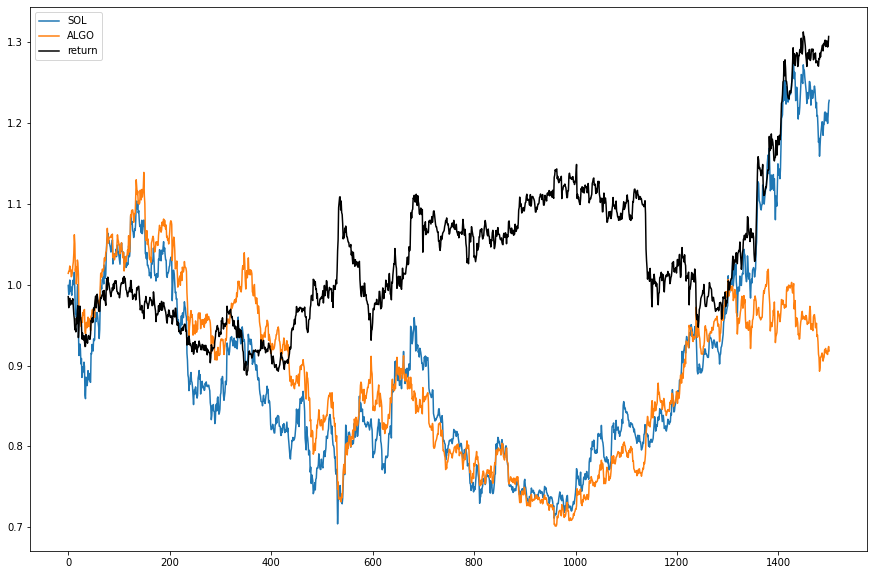

In [109]:
a,b = multi_weighted_index({"SOL":1, "ALGO":-1}, 90, resolution="1m")


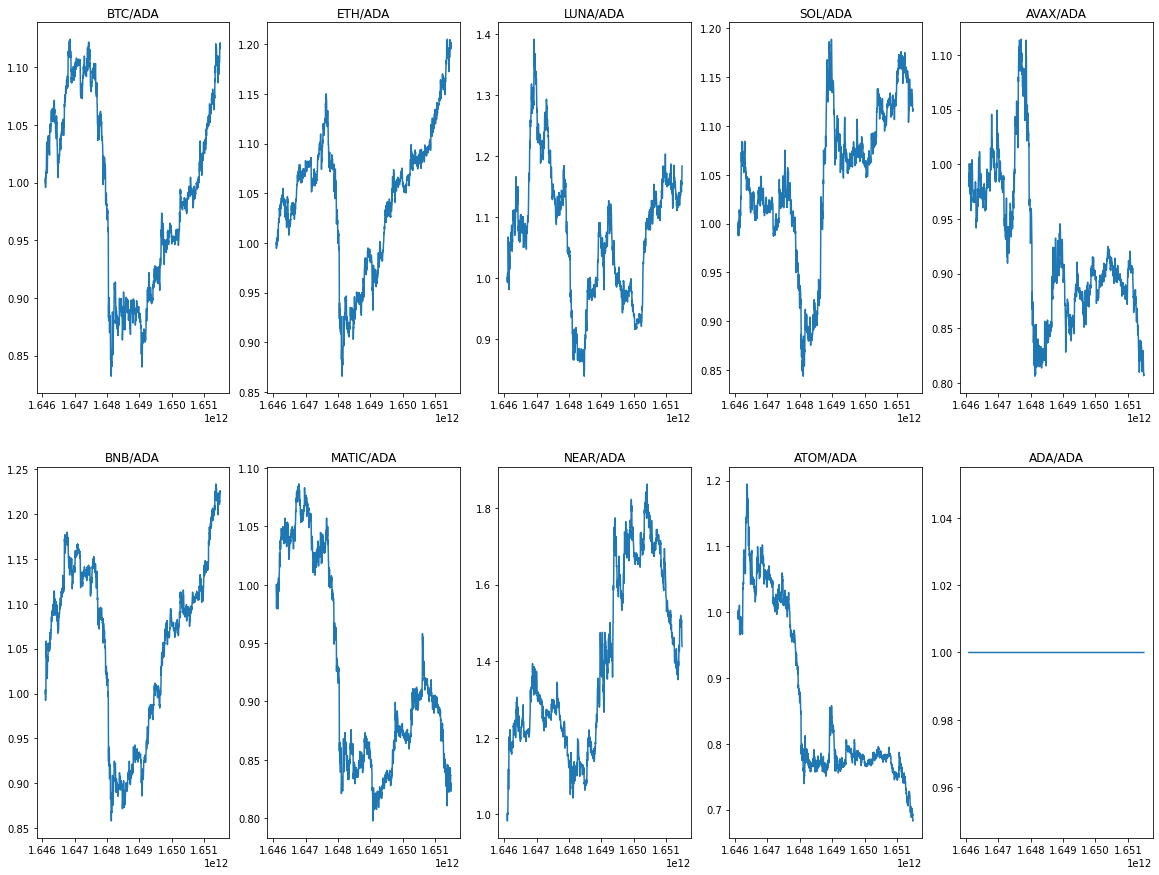

In [3]:
a= compare("2022-03-01", "ADA-PERP" , long=False)

In [ ]:
import ccxt
import numpy as np
import pandas as pd
import os
from dotenv import load_dotenv
load_dotenv()
pd.options.plotting.backend = "plotly"
ftx =  ccxt.ftx({
                            'apiKey': os.getenv('API_KEY'),
                            'secret': os.getenv('API_SECRET'),
                        })

positions = pd.DataFrame(ftx.fetch_positions())
# positions[['symbol','notional',
#            'unrealizedPnl','contracts',
#            'markPrice', 'percentage', 'liquidationPrice',
#            'side',
#           ]]


: 

In [2]:
from termcolor import colored
p = positions[positions['notional'] > 0][['symbol','notional','side','contracts']]
total = p['notional'].sum()
p['weight'] = round(p['notional'] / total * 100,2)
print(colored("hi"), "cyan")
for i in p.sort_values(by=["weight"]).iterrows():
    print(f"{i[1]['symbol'].removesuffix('/USD:USD')} {i[1]['side']} {i[1]['contracts']} contracts ({i[1]['notional']}$) weight: {i[1]['weight']}")

NameError: name 'positions' is not defined

In [36]:
import pandas as pd
df = pd.read_csv("../data/Binance_ETHUSDT_1h.csv")

In [68]:
import pandas_ta as ta
import plotly.express as px


In [49]:
df = df[df['date'] > "2020-01-01"]
df['hma_200'] = df.ta.hma(length=200)

/var/folders/x4/v6qr377j3bbc576wq6903mvm0000gn/T/ipykernel_7073/2608586351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hma_200'] = df.ta.hma(length=200)


In [82]:
data = df[212:]
data['pct_dev'] = round(100*((data['hma_200'] - data['close']) / data['close'] ),4)


/var/folders/x4/v6qr377j3bbc576wq6903mvm0000gn/T/ipykernel_7073/57468003.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount,hma_200,pct_dev
212,1.650773e+12,2022-04-24 04:00:00,ETH/USDT,2955.93,2958.85,2948.62,2951.22,5937.2522,1.754233e+07,10974.0,2932.351310,-0.6394
213,1.650769e+12,2022-04-24 03:00:00,ETH/USDT,2932.34,2960.00,2930.01,2955.92,10693.1294,3.153426e+07,17028.0,2933.264941,-0.7664
214,1.650766e+12,2022-04-24 02:00:00,ETH/USDT,2928.01,2939.54,2922.77,2932.35,7467.4838,2.189809e+07,13130.0,2934.120668,0.0604
215,1.650762e+12,2022-04-24 01:00:00,ETH/USDT,2935.74,2942.49,2928.00,2928.01,8482.2448,2.490662e+07,13327.0,2934.902416,0.2354
216,1.650758e+12,2022-04-24 00:00:00,ETH/USDT,2933.04,2945.73,2930.40,2935.74,9451.5633,2.777303e+07,15840.0,2935.644091,-0.0033
...,...,...,...,...,...,...,...,...,...,...,...,...
20451,1.577851e+09,2020-01-01 04-AM,ETH/USDT,130.20,130.74,130.15,130.20,3347.0900,4.363809e+05,NaN,127.890402,-1.7739
20452,1.577848e+09,2020-01-01 03-AM,ETH/USDT,130.85,130.89,129.94,130.20,4691.4500,6.112795e+05,NaN,127.896096,-1.7695
20453,1.577844e+09,2020-01-01 02-AM,ETH/USDT,130.64,130.98,130.35,130.85,7500.5700,9.805787e+05,NaN,127.903092,-2.2521
20454,1.577840e+09,2020-01-01 01-AM,ETH/USDT,128.87,130.65,128.78,130.64,11128.4800,1.446168e+06,NaN,127.911104,-2.0889


In [87]:
print(f"mean of : {data['pct_dev'].mean()}")
print(f"std of : {data['pct_dev'].std()}")
sd_3 = data[abs(data['pct_dev']) > 13.5]

mean of : 0.0753152637818613
std of : 4.505967800252646


In [88]:
sd_3

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount,hma_200,pct_dev
1523,1.646053e+12,2022-02-28 13:00:00,ETH/USDT,2635.17,2640.66,2607.38,2617.56,19329.1270,5.070913e+07,33441.0,3010.124473,14.9973
1524,1.646050e+12,2022-02-28 12:00:00,ETH/USDT,2640.55,2665.79,2626.26,2635.17,22281.6042,5.899453e+07,37118.0,3005.630287,14.0583
1525,1.646046e+12,2022-02-28 11:00:00,ETH/USDT,2640.28,2646.97,2621.40,2640.54,10942.4077,2.885083e+07,21717.0,3000.400211,13.6283
1527,1.646039e+12,2022-02-28 09:00:00,ETH/USDT,2625.34,2642.58,2612.36,2612.39,13837.9246,3.641220e+07,28080.0,2987.984275,14.3774
1528,1.646035e+12,2022-02-28 08:00:00,ETH/USDT,2635.32,2658.00,2617.00,2625.34,19087.8620,5.032814e+07,36982.0,2980.936928,13.5448
...,...,...,...,...,...,...,...,...,...,...,...,...
19460,1.581419e+09,2020-02-11 11-AM,ETH/USDT,221.09,222.80,221.00,222.60,12281.4000,2.723713e+06,NaN,254.169108,14.1820
19461,1.581415e+09,2020-02-11 10-AM,ETH/USDT,221.23,222.20,220.31,221.09,12456.7500,2.756914e+06,NaN,253.054858,14.4578
19462,1.581412e+09,2020-02-11 09-AM,ETH/USDT,220.60,222.32,220.00,221.23,21006.5000,4.648261e+06,NaN,251.917242,13.8712
19463,1.581408e+09,2020-02-11 08-AM,ETH/USDT,218.61,220.60,218.23,220.60,14283.7700,3.130295e+06,NaN,250.759171,13.6714
